In [1]:
import os
path = os.path.abspath(os.path.join('..','..'))
import sys
sys.path.append(path)
from reservoirpy.pvtpy import black_oil as bl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create a chromatography composition

In [2]:
composition = {
    'mole_fraction':[0.02,0.01,0.85,0.04,0.03,0.03,0.02]
    }


x=bl.chromatography(composition, compound=['carbon-dioxide','nitrogen','methane','ethane','propane','isobutane','n-butane'])

In [3]:
x

,mole_fraction,formula,mw,ppc,tpc
compound,,,,,
carbon-dioxide,0.02,CO2,44.0100,1071.0,87.91
nitrogen,0.01,N2,28.0134,493.1,-232.51
methane,0.85,CH4,16.0430,666.4,-116.67
ethane,0.04,C2H6,30.0700,706.5,89.92
propane,0.03,C3H8,44.0970,616.0,206.06
isobutane,0.03,C4H10,58.1230,527.9,274.46
n-butane,0.02,C4H10,58.1230,550.6,305.62


## Estimate some properties

### Apparent Molecular Weigt

The apparent Molecular Weight (ma) is calculated by summing the product of molar fraction and molecular weight of each component in the chromatography

In [4]:
x.ma

20.228744

### Gas specific gravity

The Gas specific gravity is calculated by diving the **ma** by the specific gravity of the *air*

In [5]:
x.gas_sg

0.6985063535911602

### Pseudo critical properties

The Pseudo critical properties are calulated by summing the product of mole fraction and critical properties (pressure and temperature). By default it corrects the properties by Non-hydrocarbon components with the **wichert-aziz** correlation. 

In [6]:
x.get_pseudo_critical_properties()

{'ppc': array([695.6353554]), 'tpc': array([-78.93109373])}

In [7]:
x.get_pseudo_critical_properties(correct=False)

{'ppc': 666.3799999999999, 'tpc': -75.61160000000001}

In [8]:
x.get_pseudo_critical_properties(correct_method='carr_kobayashi_burrows')

{'ppc': array([673.48]), 'tpc': array([-79.7116])}

### Get the compressibility factor of gas

Estimate the compressibility factor by estimating the critical properties and applying the default correlation method **papay**

In [9]:
x.get_z(p=3000, t=180)

,z
pressure,
3000,0.873299


In [10]:
p_range = np.linspace(1000,5000,10)
x.get_z(p=p_range, t=180)

,z
pressure,
1000.000000,0.940261
1444.444444,0.919329
1888.888889,0.901855
2333.333333,0.887839
2777.777778,0.877281
3222.222222,0.870181
3666.666667,0.866539
4111.111111,0.866355
4555.555556,0.869629


### Get the gas density in lb/ft3

Estimate the gas density by estimating the **ma**, the **z** factor and finnaly applying the gas equation of state for **real gases**

In [11]:
x.get_rhog(p=3000,t=180)

,rhog
pressure,
3000,10.11923


In [12]:
x.get_rhog(p=3000,t=180, rhog_method='ideal_gas')

,rhog
pressure,
3000,8.837114


In [13]:
x.get_rhog(p=np.linspace(1000,5000,10),t=180,rhog_method='real_gas')

,rhog
pressure,
1000.000000,3.132860
1444.444444,4.628275
1888.888889,6.169627
2333.333333,7.741617
2777.777778,9.327126
3222.222222,10.907744
3666.666667,12.464429
4111.111111,13.978238
4555.555556,15.431087


### Estimate the Specific volume of Gas. 

Get the specific volume by estimate the inverse of the density

In [14]:
x.get_sv(p=3000,t=180, rhog_method='ideal_gas')

,sv
pressure,
3000,0.113159


In [15]:
x.get_sv(p=3000,t=180, rhog_method='real_gas')

,sv
pressure,
3000,0.098822


# Create the Gas object

In [16]:
fm = 'formation_1'
t= 210
chrom = x
g = bl.gas(formation=fm, temp=t, chromatography=chrom)


In [17]:
g.pseudo_critical_properties()

{'ppc': array([695.6353554]), 'tpc': array([-78.93109373])}

In [18]:
g.pvt_from_correlations()

In [19]:
g.pvt

,z,rhog,bg,mug,cg
pressure,,,,,
20.000000,0.998856,0.056341,0.168312,0.013464,0.050000
282.105263,0.984428,0.806347,0.011760,0.013644,0.003545
544.210526,0.971036,1.576979,0.006013,0.013926,0.001838
806.315789,0.958682,2.366601,0.004007,0.014283,0.001240
1068.421053,0.947365,3.173362,0.002988,0.014707,0.000936
1330.526316,0.937085,3.995202,0.002374,0.015197,0.000752
1592.631579,0.927843,4.829868,0.001963,0.015752,0.000628
1854.736842,0.919638,5.674920,0.001671,0.016374,0.000539
2116.842105,0.912470,6.527758,0.001453,0.017064,0.000472


In [20]:
## Gas without chromatography

In [21]:
gas_t = bl.gas(formation=fm, temp=t, sg=0.68)

In [22]:
gas_t.pvt_from_correlations()

In [23]:
gas_t.pvt

,z,rhog,bg,mug,cg
pressure,,,,,
20.000000,0.998804,0.054851,0.168303,0.013558,0.050000
282.105263,0.983725,0.785544,0.011752,0.013732,0.003545
544.210526,0.969752,1.537232,0.006005,0.014006,0.001838
806.315789,0.956884,2.308230,0.003999,0.014351,0.001240
1068.421053,0.945121,3.096620,0.002981,0.014762,0.000936
1330.526316,0.934464,3.900262,0.002367,0.015236,0.000752
1592.631579,0.924913,4.716801,0.001957,0.015774,0.000628
1854.736842,0.916467,5.543686,0.001665,0.016376,0.000539
2116.842105,0.909126,6.378188,0.001447,0.017044,0.000472


In [24]:
gas_t.pvt.interpolate(4000)

,z,rhog,bg,mug,cg
pressure,,,,,
4000,0.888975,12.325274,0.000749,0.02382,0.00025


In [25]:
gas_t.pvt.interpolate(np.linspace(40,3000,10))

,z,rhog,bg,mug,cg
pressure,,,,,
40.000000,0.997653,0.110606,0.156358,0.013572,0.046455
368.888889,0.979098,1.034429,0.009849,0.013823,0.002980
697.777778,0.962212,1.988959,0.004830,0.014208,0.001488
1026.666667,0.946995,2.971027,0.003143,0.014696,0.000984
1355.555556,0.933552,3.978236,0.002328,0.015288,0.000740
1684.444444,0.921954,5.006451,0.001855,0.015985,0.000597
2013.333333,0.912025,6.048632,0.001533,0.016780,0.000499
2342.222222,0.903765,7.099836,0.001303,0.017675,0.000428
2671.111111,0.897300,8.154691,0.001133,0.018679,0.000375


In [26]:
from reservoirpy.wellproductivitypy import pi

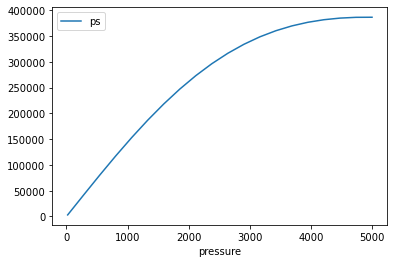

In [27]:
dt = gas_t.pvt.copy()

dt['ps'] = (2*dt.index) / (dt['z']*dt['mug'])
dt.plot(y='ps')

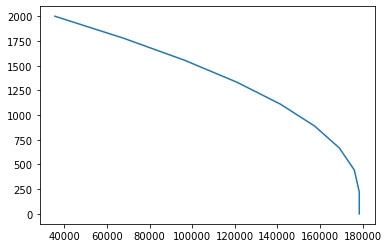

In [28]:
df,aof = pi.gas_inflow_curve(2000,6.4e-4,gas_t.pvt)

plt.plot(df['q'],df['p'])

In [29]:
# Example takek

In [30]:
pvt_data = np.array([
[0, 0.01270, 1.000],
[400, 0.01286, 0.937],
[1200, 0.01530, 0.832],
[1600, 0.01680, 0.794],
[2000, 0.01840,0.770],
[3200, 0.02340, 0.797],
[3600, 0.02500,0.827],
[4000, 0.02660, 0.860]
])

pvt_pi=bl.pvt(pvt_data, columns=['pressure','mug','z'])
pvt_pi

,mug,z
pressure,,
0.0,0.01270,1.000
400.0,0.01286,0.937
1200.0,0.01530,0.832
1600.0,0.01680,0.794
2000.0,0.01840,0.770
3200.0,0.02340,0.797
3600.0,0.02500,0.827
4000.0,0.02660,0.860


J Gas: 0.00011248025127012314


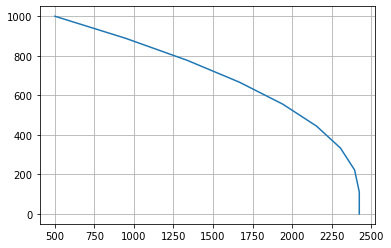

In [64]:
j_gas = pi.gas_j(h=6,k=100,re=1000,rw=0.75,temp=122,s=0)

print(f"J Gas: {j_gas}")

df,aof = pi.gas_inflow_curve(1000,3e-5,pvt_pi,n=10)

plt.plot(df['q'],df['p'])
plt.grid()

In [57]:
df

,p,q
0,0.000000,19417.584183
1,111.111111,19417.584183
2,222.222222,19180.705678
3,333.333333,18463.154989
4,444.444444,17250.700873
5,555.555556,15538.488375
6,666.666667,13344.662691
7,777.777778,10688.323716
8,888.888889,7575.664030
9,1000.000000,4011.632939


,z,rhog,bg,mug,cg,ps
pressure,,,,,,
20.000000,0.998804,0.054851,0.168303,0.013558,0.050000,2953.735079
282.105263,0.983725,0.785544,0.011752,0.013732,0.003545,41765.544338
544.210526,0.969752,1.537232,0.006005,0.014006,0.001838,80137.648026
806.315789,0.956884,2.308230,0.003999,0.014351,0.001240,117435.679672
1068.421053,0.945121,3.096620,0.002981,0.014762,0.000936,153161.302871
1330.526316,0.934464,3.900262,0.002367,0.015236,0.000752,186902.035887
1592.631579,0.924913,4.716801,0.001957,0.015774,0.000628,218321.818085
1854.736842,0.916467,5.543686,0.001665,0.016376,0.000539,247159.510197
2116.842105,0.909126,6.378188,0.001447,0.017044,0.000472,273228.679812
